In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from python_utils.density_utils import density_map
import pickle

In [4]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 14

In [5]:
# ahem
# grid minmax = {-7 -8 -2} {140 140 151}
# 66.07920837402344 66.32608795166016 45.168216705322266

# mspa
# grid minmax = {-8 -7 -3} {134 131 143}


In [6]:
pores = ["ahem", "mspa", "k238a", "wt", "csgg"]
colors = {"ahem": "#F75939", "mspa": "#F7B836", "k238a": "#309FF6", "wt": "#7F2DEB", "csgg": "#D4F733"}
labels = {"ahem": r"$\alpha$-haemolysin", "mspa": "MspA", "k238a": "Aerolysin K238A", "wt": "Aerolysin WT", "csgg": "CsgG"}
path = "/home/racoon/different_pores"
pore_paths = {pore: os.path.join(path, pore) for pore in pores}


mean_dens_name = "mean_densities.npz"
profile_name = "density_profile.pickle"

density_paths = {pore: os.path.join(pore_paths[pore], mean_dens_name) for pore in pores}
profile_paths = {pore: os.path.join(pore_paths[pore], profile_name) for pore in pores}

In [46]:
den_maps = {}
profile = {}
for pore in pores:
    den_maps[pore] = density_map()
    den_maps[pore].maps_from_npz(np.load(density_paths[pore]))
    # den_maps[pore].circular_average(symmetry[pore])
    # r, x_av = den_maps[pore].find_r()
    # den_maps[pore].make_density_profiles()
    with open(profile_paths[pore], 'rb') as handle:
        profile[pore] = pickle.load(handle)

In [47]:
symmetry = {"ahem": 7, "mspa": 8, "k238a": 7, "wt": 7, "csgg": 9}
gridmin = {"ahem": [0, 0, 0], "mspa": [-8, -7, -3], "k238a": [0, 0, 40], "wt": [-4, -4, 16], "csgg": [-71, -74, -47]}
gridmax = {"ahem": [149, 149, 149], "mspa": [134, 131, 143], "k238a": [117, 117, 190], "wt": [121, 119, 171], "csgg": [72, 71, 105]}
memb_com = {"ahem": [66, 66, 45], "mspa": [63, 60, 43], "k238a": [59, 57, 93], "wt": [59, 57, 75], "csgg": [1, -2, -4]}

# Very bad
tick_positions = {pore: [np.arange(den_maps[pore].map["wat"].shape[i]) for i in range(3)] for pore in pores}
tick_labels = {pore: [coord - (memb_com[pore][i] - gridmin[pore][i]) for i, coord in enumerate(tick_positions[pore])] for pore in pores}
tick_labels_x = {pore: tick_positions[pore][0] - int(profile[pore]["x_av"]) for pore in pores}
tick_start = {"ahem": [12, 14, 8], "mspa": [10, 3, 20], "k238a": [18, 19, 17], "wt": [2, 19, 16], "csgg": [10, 19, 9]}
tick_pstart = {"ahem": [0, 14, 5], "mspa": [0, 3, 26], "k238a": [0, 19, 13], "wt": [0, 19, 12], "csgg": [0, 19, 9]}
membrane_thickness = 112 - 70

In [48]:
den_maps["ahem"].map["wat"].shape

(147, 148, 153)

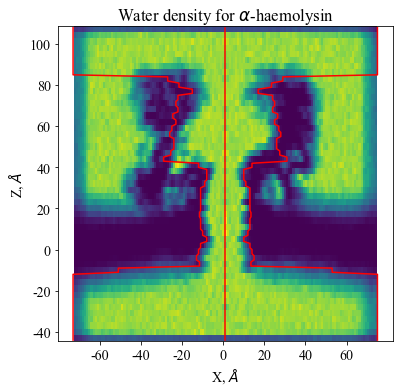

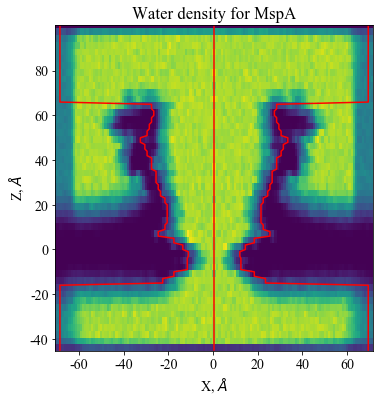

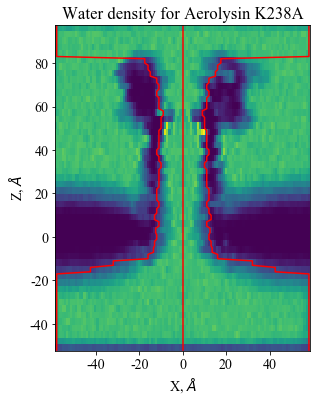

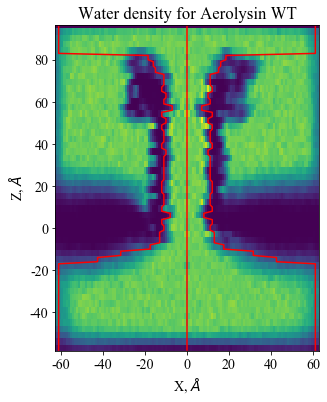

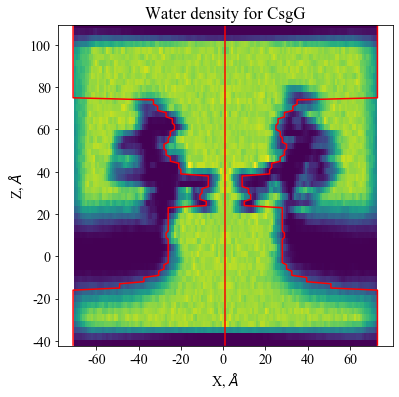

In [49]:
for pore in pores:
    plt.figure(figsize=(6, 6))
    plt.title("Water density for " + labels[pore])
    plt.imshow(np.rot90(den_maps[pore].map["wat"][:, int(profile[pore]["y_av"]), :]))
    plt.plot([profile[pore]["x_av"]] * len(den_maps[pore].Z), tick_positions[pore][2], "r")
    plt.plot([profile[pore]["x_av"]] + np.array(profile[pore]["r"][::-1]), tick_positions[pore][2], "r")
    plt.plot([profile[pore]["x_av"]] - np.array(profile[pore]["r"][::-1]), tick_positions[pore][2], "r")

    # plt.xticks(tick_positions[pore][0][tick_start[pore][0]::20], tick_labels[pore][0][tick_start[pore][0]::20])
    plt.xticks(tick_positions[pore][0][tick_start[pore][0]::20], tick_labels_x[pore][tick_start[pore][0]::20])
    plt.yticks(tick_positions[pore][2][tick_start[pore][2]::20], tick_labels[pore][2][-tick_start[pore][2]::-20])

    plt.xlabel(r"X, $\AA$")
    plt.ylabel(r"Z, $\AA$")
    plt.savefig("plots/" + pore + "watermap.png")
    plt.savefig("plots/" + pore + "watermap.svg")

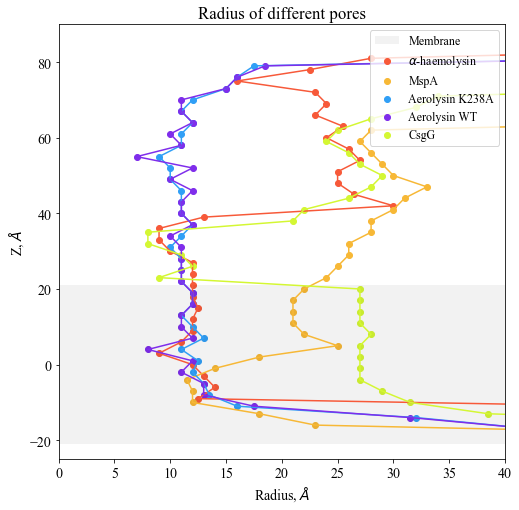

In [68]:
plt.figure(figsize=(8, 8))        
plt.axhspan(0- membrane_thickness / 2, 0 + membrane_thickness / 2, 0, 1, alpha=0.05, label="Membrane", facecolor="black" )
with open("plots/r.txt", "w") as out:
    for pore in pores:
        plt.title("Radius of different pores")
        plot_profile = [i if i < 50 else 70 for i in profile[pore]["r"][::3]]
        # plt.errorbar(tick_labels[pore][2][::3], plot_profile, yerr=np.sqrt(profile[pore]["r_var"][::3]), c=colors[pore])
        plt.plot(plot_profile, tick_labels[pore][2][::3], c=colors[pore])
        plt.scatter(plot_profile, tick_labels[pore][2][::3], label=labels[pore], c=colors[pore])
        plt.xlim(0, 40)
        plt.ylim(-25, 90)
        plt.ylabel(r"Z, $\AA$")
        plt.xlabel(r"Radius, $\AA$")        
        plt.legend(loc="upper right", fontsize=12)
        
        plt.savefig("plots/r.png")
        plt.savefig("plots/r.svg")
    
        out.write(pore + " Z\n")
        out.write(" ".join([str(i) for i in tick_labels[pore][2][::3]]) + "\n")
        out.write(pore + " radius, angstrom\n")
        out.write(" ".join([str(i) for i in plot_profile]) + "\n")
        out.write(pore + " radius err, angstrom\n")
        out.write(" ".join([str(i) for i in np.sqrt(profile[pore]["r_var"][::3])]) + "\n")

In [73]:
# for pore in pores:
#     plt.figure(figsize=(8, 6))
#     plt.title("Radius for " + labels[pore])
#     plt.plot(tick_labels[pore][2][::3], profile[pore]["r"][::3], label=labels[pore], c=colors[pore])
#     plt.xlabel(r"Z, $\AA$")
#     plt.ylabel("Radius")
   
#     plt.legend()
#     plt.savefig("plots/" + pore + "_r.png")
#     plt.savefig("plots/" + pore + "_r.svg")

In [69]:
# for pore in pores:
#     plt.figure(figsize=(8, 6))
#     plt.axvspan(0- membrane_thickness / 2, 0 + membrane_thickness / 2, 0, 1, alpha=0.05, label="Membrane", facecolor="black" )
#     plt.title("Water density profile for " + labels[pore])
#     plt.errorbar(tick_labels[pore][2][::3][3:-2], profile[pore]["wat"][::3][3:-2], yerr=np.sqrt(profile[pore]["wat_var"][::3][3:-2]), c=colors[pore])
#     plt.scatter(tick_labels[pore][2][::3][3:-2], profile[pore]["wat"][::3][3:-2], label=labels[pore], c=colors[pore])
#     plt.xlabel(r"Z, $\AA$")
#     plt.ylabel("Density")
#     plt.legend()
#     plt.savefig("plots/" + pore + "watermap.png")
#     plt.savefig("plots/" + pore + "watermap.svg")

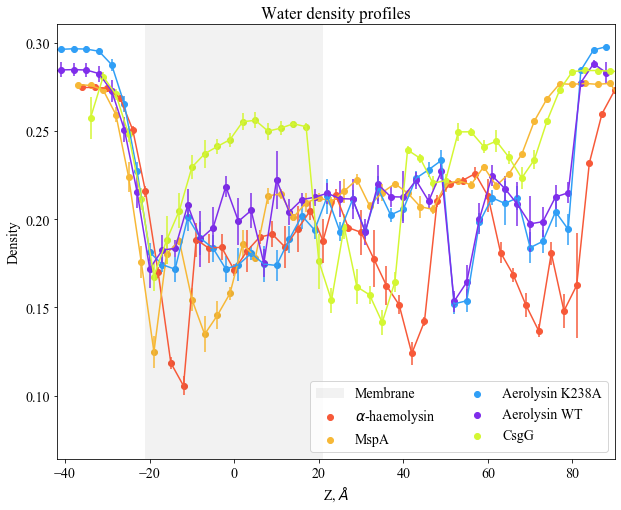

In [78]:
plt.figure(figsize=(10, 8))
plt.axvspan(0- membrane_thickness / 2, 0 + membrane_thickness / 2, 0, 1, alpha=0.05, label="Membrane", facecolor="black" )
for pore in pores:
    plt.title("Water density profiles")
    plt.errorbar(tick_labels[pore][2][::3][3:-2], profile[pore]["wat"][::3][3:-2], yerr=np.sqrt(profile[pore]["wat_var"][::3][3:-2]), c=colors[pore])
    plt.scatter(tick_labels[pore][2][::3][3:-2], profile[pore]["wat"][::3][3:-2], label=labels[pore], c=colors[pore])
    plt.xlabel(r"Z, $\AA$")
    plt.xlim(-42, 90)
    plt.ylabel("Density")
    plt.legend(ncol=2)
    plt.savefig("plots/watermap.png")
    plt.savefig("plots/watermap.svg")

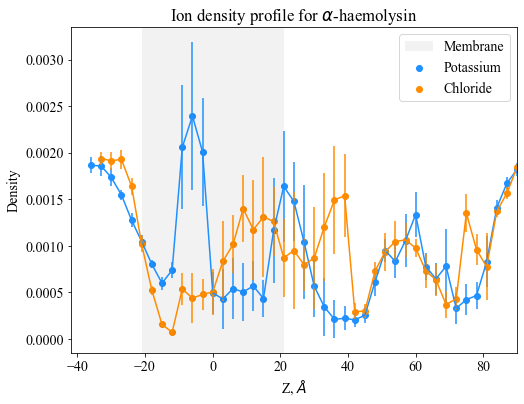

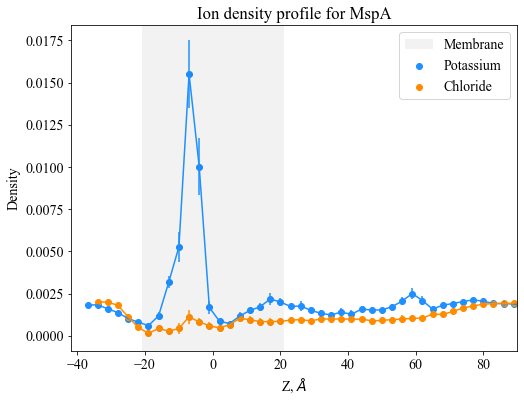

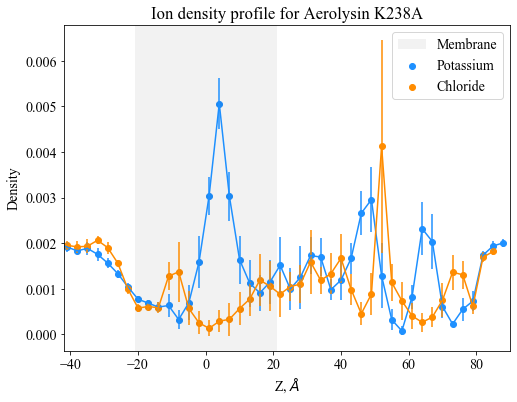

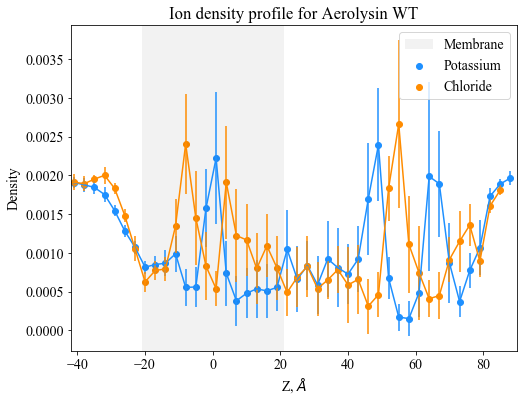

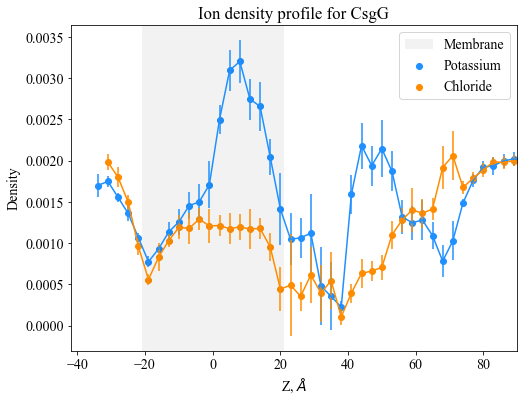

In [79]:
for pore in pores:
    plt.figure(figsize=(8, 6))
    plt.axvspan(0- membrane_thickness / 2, 0 + membrane_thickness / 2, 0, 1, alpha=0.05, label="Membrane", facecolor="black" )
    plt.title("Ion density profile for " + labels[pore])
    plt.errorbar(tick_labels[pore][2][::3][3:-2], profile[pore]["pot"][::3][3:-2], yerr=np.sqrt(profile[pore]["pot_var"][::3][3:-2]), c="dodgerblue")
    plt.scatter(tick_labels[pore][2][::3][3:-2], profile[pore]["pot"][::3][3:-2], label="Potassium", c="dodgerblue")
    plt.errorbar(tick_labels[pore][2][::3][4:-3], profile[pore]["cla"][::3][4:-3], yerr=np.sqrt(profile[pore]["cla_var"][::3][4:-3]), c="darkorange")
    plt.scatter(tick_labels[pore][2][::3][4:-3], profile[pore]["cla"][::3][4:-3], label="Chloride", c="darkorange")
    plt.xlabel(r"Z, $\AA$")
    plt.xlim(-42, 90)
    plt.ylabel("Density")
    plt.legend()
    plt.savefig("plots/" + pore + "ionmap.png")
    plt.savefig("plots/" + pore + "ionmap.svg")

In [80]:
# for pore in pores:
#     plt.figure(figsize=(8, 6))
#     plt.title("Potassium density profile for " + labels[pore])
#     plt.errorbar(tick_labels[pore][2][::3][3:-2], profile[pore]["pot"][::3][3:-2], yerr=np.sqrt(profile[pore]["pot_var"][::3][3:-2]), c=colors[pore])
#     plt.scatter(tick_labels[pore][2][::3][3:-2], profile[pore]["pot"][::3][3:-2], label=labels[pore], c=colors[pore])
#     plt.xlabel(r"Z, $\AA$")
#     plt.ylabel("Density")
#     plt.legend()
#     plt.savefig("plots/" + pore + "potmap.png")
#     plt.savefig("plots/" + pore + "potmap.svg")

In [81]:
# for pore in pores:
#     plt.figure(figsize=(8, 6))
#     plt.title("Chloride density profile for " + labels[pore])
#     plt.errorbar(tick_labels[pore][2][::3][4:-3], profile[pore]["cla"][::3][4:-3], yerr=np.sqrt(profile[pore]["cla_var"][::3][4:-3]), c=colors[pore])
#     plt.scatter(tick_labels[pore][2][::3][4:-3], profile[pore]["cla"][::3][4:-3], label=labels[pore], c=colors[pore])
#     plt.xlabel(r"Z, $\AA$")
#     plt.ylabel("Density")
#     plt.legend()
#     plt.savefig("plots/" + pore + "clamap.png")
#     plt.savefig("plots/" + pore + "clamap.svg")